In [12]:
import torch
device = torch.device('cpu')
from torch.utils.data import DataLoader
from plots.gifs import trajectory_gif
from plots.plots import get_feature_history, plt_train_error, plt_norm_state, plt_norm_control, plt_classifier, feature_plot, plt_dataset
from models.training import Trainer, robTrainer
from models.neural_odes import NeuralODE, robNeuralODE
from models.resnets import ResNet
import pickle
import sys
import matplotlib.pyplot as plt
import imageio

In [3]:
hidden_dim, data_dim = 2, 2
T, num_steps = 5.0, 10  #T is the end time, num_steps are the amount of discretization steps for the ODE solver
dt = T/num_steps
turnpike = True
bound = 0.
fp = False
cross_entropy = True



num_epochs = 70 #number of optimization epochs for gradient decent

if turnpike:
    weight_decay = 0 if bound>0. else dt*0.01
else: 
    weight_decay = dt*0.01          #0.01 for fp, 0.1 else

In [4]:
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=0, non_linearity='tanh', 
                    architecture='outside', T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)

optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3, weight_decay=weight_decay) #weight decay parameter modifies norm
trainer_anode = Trainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, 
                        turnpike=turnpike, bound=bound, fixed_projector=fp)

In [5]:

rob_node = robNeuralODE(device, data_dim, hidden_dim, augment_dim=0, non_linearity='tanh', 
                            architecture='outside', T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy, verbose = False)


optimizer_rob_node = torch.optim.Adam(rob_node.parameters(), lr=1e-3, weight_decay=weight_decay) #weight decay parameter modifies norm
trainer_rob_node = robTrainer(rob_node, optimizer_rob_node, device, cross_entropy=cross_entropy, 
                        turnpike=turnpike, bound=bound, fixed_projector=fp, verbose = False)   

In [6]:
with open('data.txt', 'rb') as fp:
    data_line, test = pickle.load(fp)
dataloader = DataLoader(data_line, batch_size=64, shuffle=False)
dataloader_viz = DataLoader(data_line, batch_size=128, shuffle=False)


trainer_anode.train(dataloader, num_epochs)
trainer_rob_node.train(dataloader, num_epochs)

/Users/Tobi/FAUbox/Python/borjan dynamical.systems/models/training.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softpred = m(y_pred)



Epoch 0/38
Loss: 0.988
Accuracy: 0.531

Epoch 10/38
Loss: 0.784
Accuracy: 0.594

Epoch 20/38
Loss: 0.795
Accuracy: 0.562

Epoch 30/38
Loss: 0.774
Accuracy: 0.500
Epoch 1: 0.857

Epoch 0/38
Loss: 0.861
Accuracy: 0.453

Epoch 10/38
Loss: 0.717
Accuracy: 0.516

Epoch 20/38
Loss: 0.724
Accuracy: 0.531

Epoch 30/38
Loss: 0.733
Accuracy: 0.422
Epoch 2: 0.774

Epoch 0/38
Loss: 0.785
Accuracy: 0.422

Epoch 10/38
Loss: 0.680
Accuracy: 0.500

Epoch 20/38
Loss: 0.685
Accuracy: 0.500

Epoch 30/38
Loss: 0.710
Accuracy: 0.359
Epoch 3: 0.726

Epoch 0/38
Loss: 0.740
Accuracy: 0.344

Epoch 10/38
Loss: 0.660
Accuracy: 0.484

Epoch 20/38
Loss: 0.663
Accuracy: 0.453

Epoch 30/38
Loss: 0.698
Accuracy: 0.438
Epoch 4: 0.697

Epoch 0/38
Loss: 0.712
Accuracy: 0.328

Epoch 10/38
Loss: 0.648
Accuracy: 0.484

Epoch 20/38
Loss: 0.648
Accuracy: 0.469

Epoch 30/38
Loss: 0.690
Accuracy: 0.453
Epoch 5: 0.679

Epoch 0/38
Loss: 0.692
Accuracy: 0.406

Epoch 10/38
Loss: 0.640
Accuracy: 0.547

Epoch 20/38
Loss: 0.638
Accu

/Users/Tobi/FAUbox/Python/borjan dynamical.systems/models/training.py:266: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softpred = m(y_pred)



Epoch 0/38
Loss: 0.804
Accuracy: 0.359
|p(0)|^2: 7.452

Epoch 10/38
Loss: 0.838
Accuracy: 0.328
|p(0)|^2: 11.543

Epoch 20/38
Loss: 0.824
Accuracy: 0.312
|p(0)|^2: 17.638

Epoch 30/38
Loss: 0.759
Accuracy: 0.438
|p(0)|^2: 4.915
Epoch 1: 0.805

Epoch 0/38
Loss: 0.758
Accuracy: 0.453
|p(0)|^2: 4.252

Epoch 10/38
Loss: 0.796
Accuracy: 0.453
|p(0)|^2: 6.345

Epoch 20/38
Loss: 0.776
Accuracy: 0.484
|p(0)|^2: 10.143

Epoch 30/38
Loss: 0.729
Accuracy: 0.578
|p(0)|^2: 3.475
Epoch 2: 0.758

Epoch 0/38
Loss: 0.715
Accuracy: 0.625
|p(0)|^2: 3.017

Epoch 10/38
Loss: 0.754
Accuracy: 0.484
|p(0)|^2: 4.463

Epoch 20/38
Loss: 0.730
Accuracy: 0.438
|p(0)|^2: 6.937

Epoch 30/38
Loss: 0.707
Accuracy: 0.422
|p(0)|^2: 2.873
Epoch 3: 0.716

Epoch 0/38
Loss: 0.683
Accuracy: 0.359
|p(0)|^2: 2.430

Epoch 10/38
Loss: 0.717
Accuracy: 0.344
|p(0)|^2: 3.603

Epoch 20/38
Loss: 0.692
Accuracy: 0.375
|p(0)|^2: 5.230

Epoch 30/38
Loss: 0.696
Accuracy: 0.406
|p(0)|^2: 2.555
Epoch 4: 0.683

Epoch 0/38
Loss: 0.662
Accur

/Users/Tobi/FAUbox/Python/borjan dynamical.systems/plots/plots.py:380: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions = m(pre_)


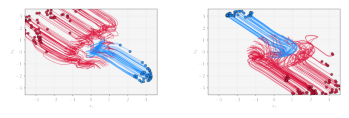

In [13]:
for inputs, targets in dataloader_viz:
    break

filename_base = '1traj'
filename_s = filename_base + '_s'
filename_r = filename_base + '_r'

plt_classifier(anode, num_steps=10, save_fig = '1generalization.pdf') 
plt_classifier(rob_node, num_steps=10, save_fig = '1rob_generalization.pdf')
trajectory_gif(anode, inputs, targets, timesteps=num_steps, filename = filename_s +'.gif')
trajectory_gif(rob_node, inputs, targets, timesteps=num_steps, filename = filename_r + '.gif')

plt.figure(1)
plt.subplot(121)
plt.imshow(imageio.imread(filename_s + '29.png'))
plt.axis('off')
plt.subplot(122)
plt.imshow(imageio.imread(filename_r + '29.png'))
plt.axis('off')

plt.savefig('1comparison_' + filename_base + '.png',
                    format='png', dpi=300, bbox_inches='tight')